In [1]:
import pandas as pd
import numpy as np
import fredpy as fp
import matplotlib.pyplot as plt

# Loading API key 


In [2]:
fp.api_key = '6ce523c65ffb8915dddf970acab037d6'

The goal of this project is to predit the corporate bond spreads. This notebook provides the code to create the dataframe required to train and run AI/ML models to predict the corporate bond spreads. The inputs used for predicting corporate bond spreads are SP 500, vix, slope(T10y-T2y spreads), skew, GDP, fed fund rate, inflation rate


# Downloading the required input data

The breakeven inflation rate represents a measure of expected inflation derived from 10-Year Treasury Constant Maturity Securities (BC_10YEAR) and 10-Year Treasury Inflation-Indexed Constant Maturity Securities (TC_10YEAR). The latest value implies what market participants expect inflation to be in the next 10 years, on average.
Starting with the update on June 21, 2019, the Treasury bond data used in calculating interest rate spreads is obtained directly from the U.S. Treasury Department. 

The federal funds rate is the interest rate at which depository institutions trade federal funds (balances held at Federal Reserve Banks) with each other overnight. When a depository institution has surplus balances in its reserve account, it lends to other banks in need of larger balances. In simpler terms, a bank with excess cash, which is often referred to as liquidity, will lend to another bank that needs to quickly raise liquidity. (1) The rate that the borrowing institution pays to the lending institution is determined between the two banks; the weighted average rate for all of these types of negotiations is called the effective federal funds rate.(2) The effective federal funds rate is essentially determined by the market but is influenced by the Federal Reserve through open market operations to reach the federal funds rate target.

The S&P CoreLogic Case-Shiller Home Price Indices are the leading measures of U.S. residential real estate prices, tracking changes in the value of residential real estate nationally. 

The effective yield of the ICE BofA AAA US Corporate Index, a subset of the ICE BofA US Corporate Master Index tracking the performance of US dollar denominated investment grade rated corporate debt publicly issued in the US domestic market.

In [3]:
# Restrict observations from January 1, 2014 to 2023 with daily frequency
win = ['01-01-2014','01-01-2023']

sp500 = fp.series('SP500').window(win).as_frequency(freq='D')
vix = fp.series('VIXCLS').window(win).as_frequency(freq='D')
slope = fp.series('T10Y2Y').window(win).as_frequency(freq='D')
gdp = fp.series('GDP').window(win).as_frequency(freq='Q')
fedfund_rate = fp.series('DFF').window(win).as_frequency(freq='D')
breakeven_inflation_rate = fp.series('T10YIE').window(win).as_frequency(freq='D')
case_schiller_index = fp.series('CSUSHPINSA').window(win).as_frequency(freq='M')
cb_spreads = fp.series('BAMLC0A1CAAAEY').window(win).as_frequency(freq='D')
cpi = fp.series('CPIAUCSL').window(win).as_frequency(freq='M')

# Equalize the date ranges
[sp500, vix, slope, gdp, fedfund_rate, breakeven_inflation_rate, case_schiller_index, cb_spreads,cpi] = fp.window_equalize([sp500, vix, slope, gdp, fedfund_rate, breakeven_inflation_rate, case_schiller_index, cb_spreads,cpi])

# plotting the data


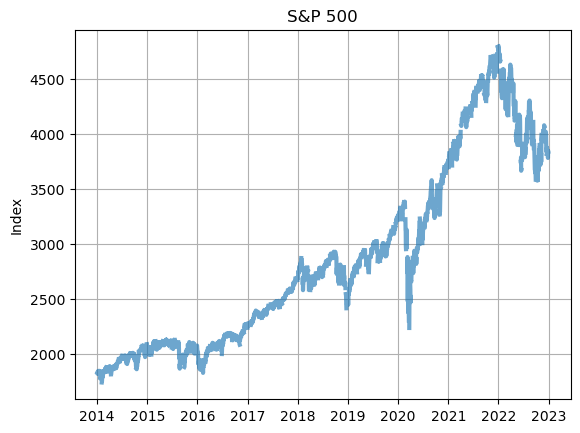

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(sp500.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(sp500.title)
ax.set_ylabel(sp500.units);

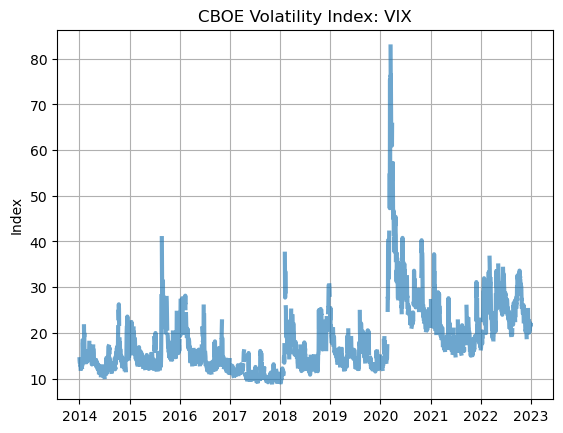

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(vix.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(vix.title)
ax.set_ylabel(vix.units);

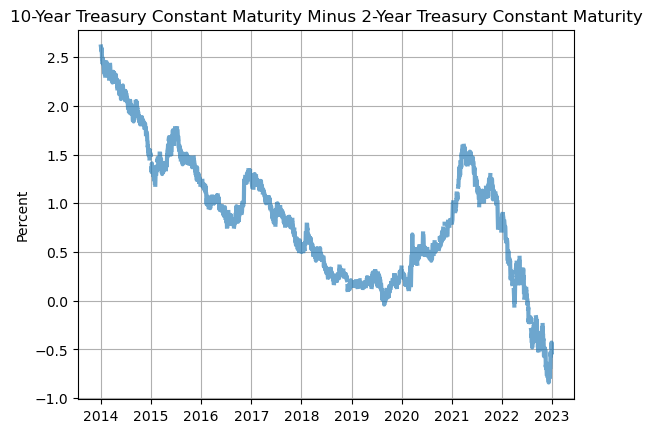

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(slope.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(slope.title)
ax.set_ylabel(slope.units);

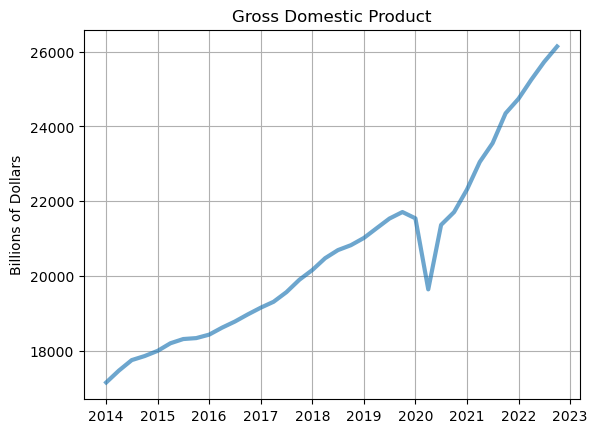

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(gdp.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(gdp.title)
ax.set_ylabel(gdp.units);

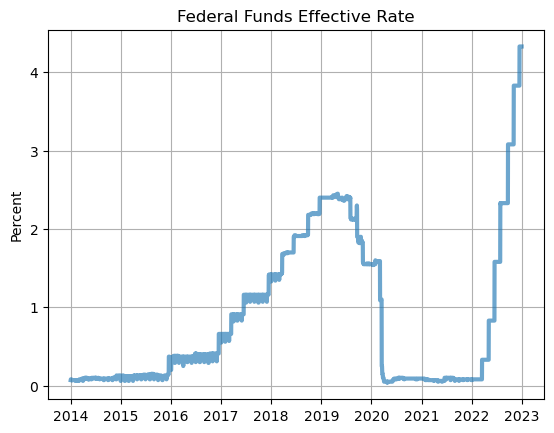

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(fedfund_rate.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(fedfund_rate.title)
ax.set_ylabel(fedfund_rate.units);

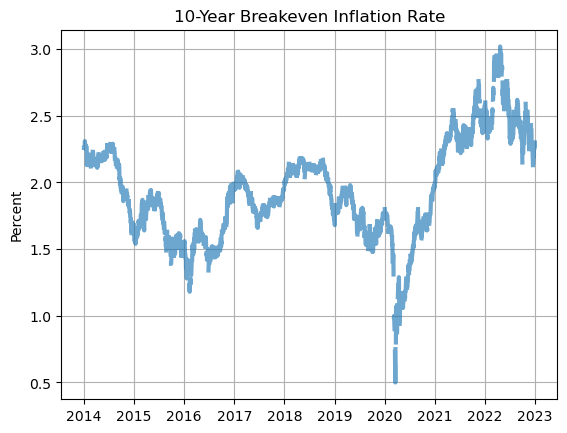

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(breakeven_inflation_rate.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(breakeven_inflation_rate.title)
ax.set_ylabel(breakeven_inflation_rate.units);

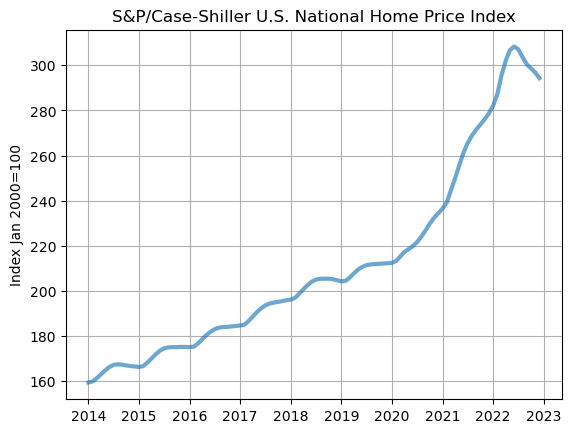

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(case_schiller_index.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(case_schiller_index.title)
ax.set_ylabel(case_schiller_index.units);

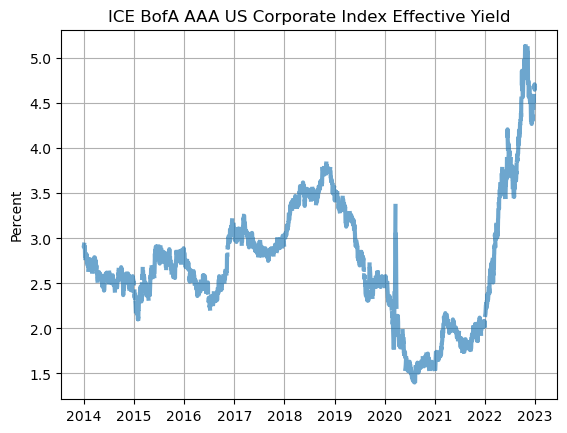

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(cb_spreads.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(cb_spreads.title)
ax.set_ylabel(cb_spreads.units);

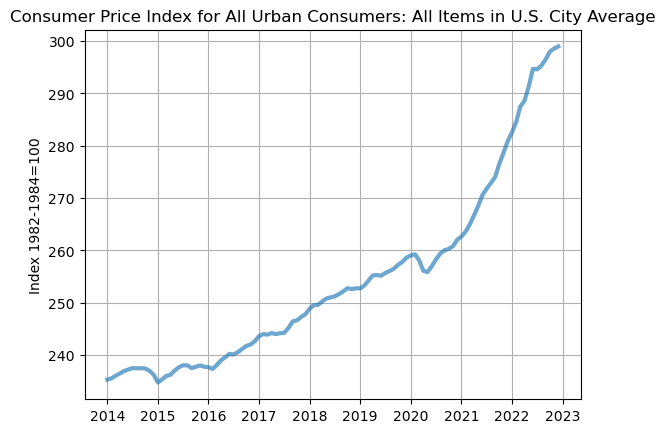

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(cpi.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(cpi.title)
ax.set_ylabel(cpi.units);

In [13]:
data = {'SP500': sp500.data,'Vix': vix.data, 'slope': slope.data,'GDP': gdp.data,'Fed fund rate': fedfund_rate.data, 'Breakeven inflation rate': breakeven_inflation_rate.data, 'House price index': case_schiller_index.data, 'US-AAA yield': cb_spreads.data,'CPI': cpi.data}


In [14]:
df = pd.DataFrame(data)
df

,SP500,Vix,slope,GDP,Fed fund rate,Breakeven inflation rate,House price index,US-AAA yield,CPI
date,,,,,,,,,
2014-01-01,NaN,NaN,NaN,17144.281,0.07,NaN,159.369,NaN,235.288
2014-01-02,1831.98,14.23,2.61,NaN,0.08,2.26,NaN,2.92,NaN
2014-01-03,1831.37,13.76,2.60,NaN,0.08,2.26,NaN,2.93,NaN
2014-01-04,NaN,NaN,NaN,NaN,0.08,NaN,NaN,NaN,NaN
2014-01-05,NaN,NaN,NaN,NaN,0.08,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-12-26,NaN,NaN,NaN,NaN,4.33,NaN,NaN,NaN,NaN
2022-12-27,3829.25,21.65,-0.48,NaN,4.33,2.26,NaN,4.68,NaN
2022-12-28,3783.22,22.14,-0.43,NaN,4.33,2.28,NaN,4.71,NaN


In [15]:
# interpolated dataframe 
df = pd.DataFrame(data)
df = df.interpolate(method='linear', axis=0).ffill().bfill()
df.head()

,SP500,Vix,slope,GDP,Fed fund rate,Breakeven inflation rate,House price index,US-AAA yield,CPI
date,,,,,,,,,
2014-01-01,1831.980000,14.23,2.610000,17144.281000,0.07,2.26,159.369000,2.92,235.288000
2014-01-02,1831.980000,14.23,2.610000,17147.819022,0.08,2.26,159.385226,2.92,235.296355
2014-01-03,1831.370000,13.76,2.600000,17151.357044,0.08,2.26,159.401452,2.93,235.304710
2014-01-04,1829.836667,13.69,2.593333,17154.895067,0.08,2.26,159.417677,2.92,235.313065
2014-01-05,1828.303333,13.62,2.586667,17158.433089,0.08,2.26,159.433903,2.91,235.321419


<Axes: xlabel='date'>

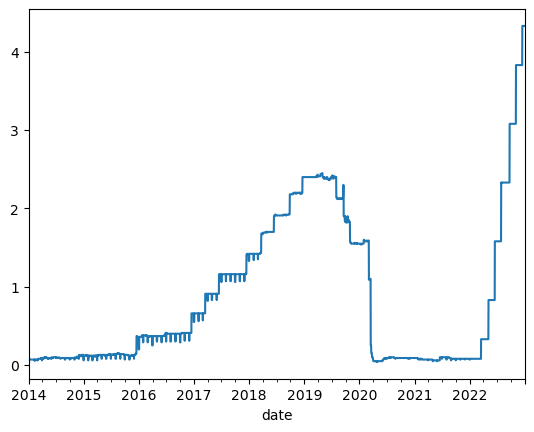

In [16]:
df["Fed fund rate"].plot()

# Linear regression

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
X = df[['SP500','Vix','slope','GDP','Fed fund rate','Breakeven inflation rate','House price index','CPI']]
y = df['US-AAA yield']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

In [19]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 5.088542362519869
betas = [-1.21039650e-03  2.93485818e-03 -1.51283575e-01 -7.49968620e-05
  4.68566025e-01  1.03817205e+00  2.93881447e-02 -2.31770462e-02]


In [20]:
Y_predicted = model.predict(X)

In [21]:
df['US-AAA yield OLS predicted' ] = Y_predicted

<Axes: xlabel='date'>

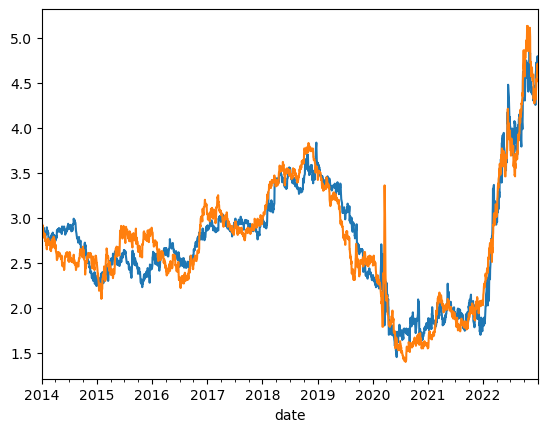

In [22]:
df["US-AAA yield OLS predicted"].plot() 
df["US-AAA yield"].plot() 


# Ai models

In [23]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense   

2023-04-27 17:51:19.999589: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
df_univariate = df["US-AAA yield"]

In [25]:
train, validate, test = \
              np.split(df_univariate.sample(frac=1, random_state=None), 
                       [int(.7*len(df)), int(.9*len(df))])

In [26]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

In [27]:
n_steps = 5

# train
sequence_train = train.to_list()
X_train,Y_train = split_sequence(train, n_steps)

# test
sequence_test = test.to_list()
X_test,Y_test = split_sequence(test, n_steps)

# validate
sequence_validate = validate.to_list()
X_validate,Y_validate = split_sequence(validate, n_steps)


In [28]:
print(X_train)
print(Y_train)

[[1.6        3.3        3.19666667 2.96       2.58333333]
 [3.3        3.19666667 2.96       2.58333333 1.89      ]
 [3.19666667 2.96       2.58333333 1.89       3.14333333]
 ...
 [3.03       3.75       2.99       3.61       1.97      ]
 [3.75       2.99       3.61       1.97       2.45      ]
 [2.99       3.61       1.97       2.45       2.28      ]]
[1.89       3.14333333 2.21       ... 2.45       2.28       2.37      ]


Splitting the dataframe into train test and validate

In [ ]:
n_features = 1

# define model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mape')

# fit model
model.fit(X_train, Y_train,epochs=150,batch_size=100, validation_data=(X_test, Y_test), verbose=1, shuffle=False)

Epoch 1/150
23/23 [==============================] - 1s 9ms/step - loss: 72.2760 - val_loss: 44.0221
Epoch 2/150
23/23 [==============================] - 0s 4ms/step - loss: 28.9396 - val_loss: 23.5463
Epoch 3/150
23/23 [==============================] - 0s 4ms/step - loss: 24.4130 - val_loss: 22.0151
Epoch 4/150
23/23 [==============================] - 0s 4ms/step - loss: 23.9645 - val_loss: 21.8540
Epoch 5/150
23/23 [==============================] - 0s 4ms/step - loss: 23.6409 - val_loss: 21.5845
Epoch 6/150
23/23 [==============================] - 0s 4ms/step - loss: 23.3009 - val_loss: 21.2327
Epoch 7/150
23/23 [==============================] - 0s 4ms/step - loss: 22.9782 - val_loss: 20.9205
Epoch 8/150
23/23 [==============================] - 0s 4ms/step - loss: 22.6644 - val_loss: 20.6535
Epoch 9/150
23/23 [==============================] - 0s 4ms/step - loss: 22.3603 - val_loss: 20.3916
Epoch 10/150
23/23 [==============================] - 0s 4ms/step - loss: 22.0812 - val_los

In [30]:
# demonstrate prediction
Y_hat = model.predict(X_validate, verbose=0)
print(Y_hat.flatten())

[2.512759  2.568394  2.5385935 2.557142  2.556354  2.5616271 2.553004
 2.5067735 2.5767753 2.5281458 2.611115  2.5686233 2.5512407 2.564638
 2.5463405 2.5473354 2.6046958 2.5310724 2.5655565 2.5388746 2.5066917
 2.5744715 2.5801146 2.533976  2.5714471 2.5805292 2.5534062 2.5685728
 2.5543954 2.549236  2.4958525 2.53714   2.5144188 2.5566435 2.5581057
 2.576473  2.5141973 2.585872  2.5971353 2.5220866 2.4970756 2.4774935
 2.587813  2.570523  2.5495694 2.574837  2.5616179 2.5411756 2.5599592
 2.5690968 2.5580275 2.5443468 2.6106193 2.5811074 2.5496697 2.556586
 2.5605228 2.5743785 2.5639865 2.5612195 2.5636714 2.5532575 2.5944245
 2.5510738 2.5581043 2.5614965 2.5601966 2.5329685 2.619383  2.5780666
 2.5501463 2.531318  2.5757139 2.5663273 2.5411434 2.5977607 2.5707574
 2.5358236 2.6026084 2.5565248 2.5547616 2.5629625 2.5689738 2.5603642
 2.5564387 2.567836  2.555601  2.5547159 2.5842047 2.556816  2.5181987
 2.5337875 2.5687168 2.571401  2.5531409 2.5664237 2.5428598 2.5643942
 2.565824

In [31]:
Y_validate.flatten()

array([2.66      , 2.73      , 4.39      , 2.1       , 3.13      ,
       2.41      , 3.515     , 2.82      , 1.61      , 3.23      ,
       2.9       , 3.07      , 2.66      , 2.55      , 1.68666667,
       2.75      , 1.59      , 2.5       , 2.62      , 1.58      ,
       3.22      , 2.96      , 2.02      , 2.35      , 2.78      ,
       3.72333333, 2.49      , 3.66      , 2.72      , 3.42      ,
       3.76      , 2.37      , 2.28      , 1.98      , 2.4       ,
       1.5825    , 5.01      , 3.67      , 2.31      , 3.16      ,
       1.585     , 3.45      , 2.12333333, 1.86      , 2.62      ,
       2.61333333, 2.55      , 2.58      , 2.77      , 3.52666667,
       1.6       , 2.68      , 2.59      , 2.83      , 2.76      ,
       2.46      , 2.85      , 2.75333333, 2.7       , 2.48      ,
       1.87      , 2.63      , 2.23      , 2.52      , 2.8       ,
       3.28      , 1.41333333, 3.12      , 3.42      , 2.86      ,
       1.96333333, 3.21      , 2.58      , 1.9       , 3.51   

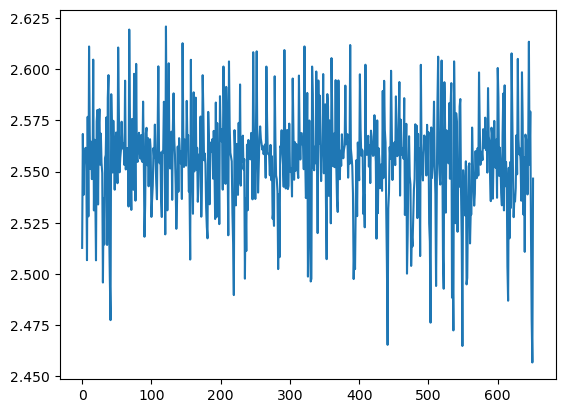

In [32]:
plt.plot(Y_hat.flatten())


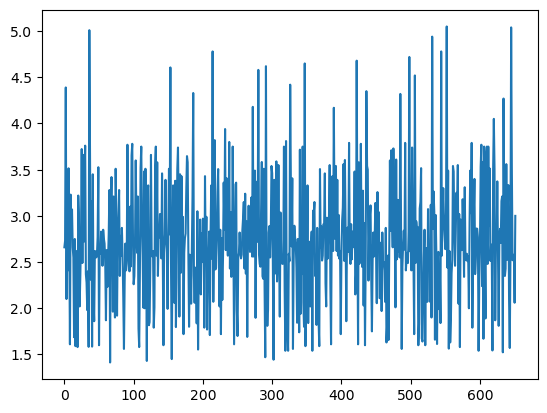

In [33]:
plt.plot(Y_validate)

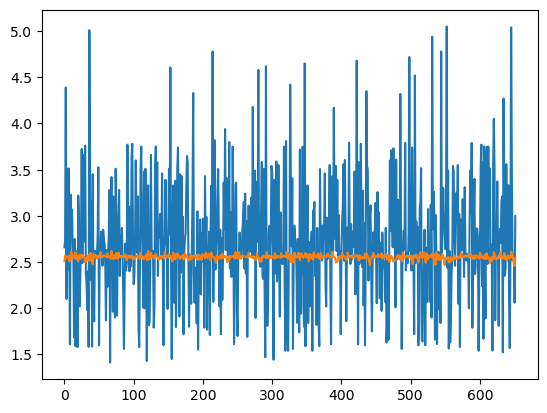

In [34]:
plt.plot(Y_validate)
plt.plot(Y_hat.flatten())